## 1. Load Dependant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

c:\Users\Amir\anaconda3\envs\tensorflow\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 2. Setup Directories

In [2]:
mainDIR = os.listdir('./images')
train_folder= './images/train/'
test_folder = './images/test/'

train_b = train_folder+'benign/'
train_m = train_folder+'malignant/'

tot_benign_train = len(os.listdir(train_b))
tot_malignant_train = len(os.listdir(train_m))
print('total benign images: ', tot_benign_train)
print('total malignant images: ', tot_malignant_train)

total benign images:  1440
total malignant images:  1197


## 3. Load Images into Keras and split into Train, Validation and Test

In [3]:
target_size = (224, 224)
input_shape = (224, 224, 3)
batch_size = 32

print("Train Dataset....")
train_dir = tf.keras.preprocessing.image_dataset_from_directory(train_folder, 
                                                                image_size=target_size, 
                                                                batch_size=batch_size,
                                                                shuffle=True,
                                                                label_mode='binary',
                                                                validation_split=0.2,
                                                                subset='training',
                                                                seed=101)



print("Validation Dataset....")
val_dir = tf.keras.preprocessing.image_dataset_from_directory(train_folder, 
                                                              image_size=target_size, 
                                                              batch_size=batch_size,
                                                              label_mode='binary',
                                                              subset='validation',
                                                              validation_split=0.2,
                                                              seed=101)

print("Test Dataset...")
test_dir = tf.keras.preprocessing.image_dataset_from_directory(test_folder, 
                                                               image_size=target_size, 
                                                               batch_size=batch_size, 
                                                               label_mode='binary',
                                                               seed=101)

Train Dataset....
Found 2637 files belonging to 2 classes.
Using 2110 files for training.
Validation Dataset....
Found 2637 files belonging to 2 classes.
Using 527 files for validation.
Test Dataset...
Found 660 files belonging to 2 classes.


In [4]:
autotune = tf.data.AUTOTUNE ### most important function for speed up training


train_data_batches = train_dir.cache().prefetch(buffer_size=autotune)
valid_data_batches = val_dir.cache().prefetch(buffer_size=autotune)
test_data_batches = test_dir.cache().prefetch(buffer_size=autotune)

## 4. Create, Compile and Train Model

In [5]:
model_1 = tf.keras.models.Sequential()
model_1.add(tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
model_1.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
model_1.add(tf.keras.layers.Conv2D(32, (3, 3), activation="relu"))
model_1.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(activation = 'relu', units = 128))
model_1.add(tf.keras.layers.Dense(activation = 'sigmoid', units = 1))

model_1.compile(optimizer = 'adam', 
                loss = 'binary_crossentropy', 
                metrics = ['accuracy'])

history_1 = model_1.fit(train_data_batches,
                         epochs = 50,
                         batch_size=batch_size,
                         validation_data = valid_data_batches)

Epoch 1/50
66/66 [==============================] - 3s 18ms/step - loss: 89.0526 - accuracy: 0.5844 - val_loss: 0.6636 - val_accuracy: 0.6167
Epoch 2/50
66/66 [==============================] - 1s 13ms/step - loss: 1.2191 - accuracy: 0.6502 - val_loss: 0.6616 - val_accuracy: 0.5825
Epoch 3/50
66/66 [==============================] - 1s 13ms/step - loss: 0.6410 - accuracy: 0.6256 - val_loss: 0.6434 - val_accuracy: 0.6433
Epoch 4/50
66/66 [==============================] - 1s 13ms/step - loss: 0.6486 - accuracy: 0.6749 - val_loss: 0.6479 - val_accuracy: 0.6319
Epoch 5/50
66/66 [==============================] - 1s 13ms/step - loss: 0.6091 - accuracy: 0.6711 - val_loss: 0.6651 - val_accuracy: 0.6376
Epoch 6/50
66/66 [==============================] - 1s 13ms/step - loss: 0.5894 - accuracy: 0.6886 - val_loss: 0.6902 - val_accuracy: 0.6148
Epoch 7/50
66/66 [==============================] - 1s 13ms/step - loss: 0.6063 - accuracy: 0.6711 - val_loss: 0.7018 - val_accuracy: 0.6395
Epoch 8/50
6

## 9. Visualize Model Metrics

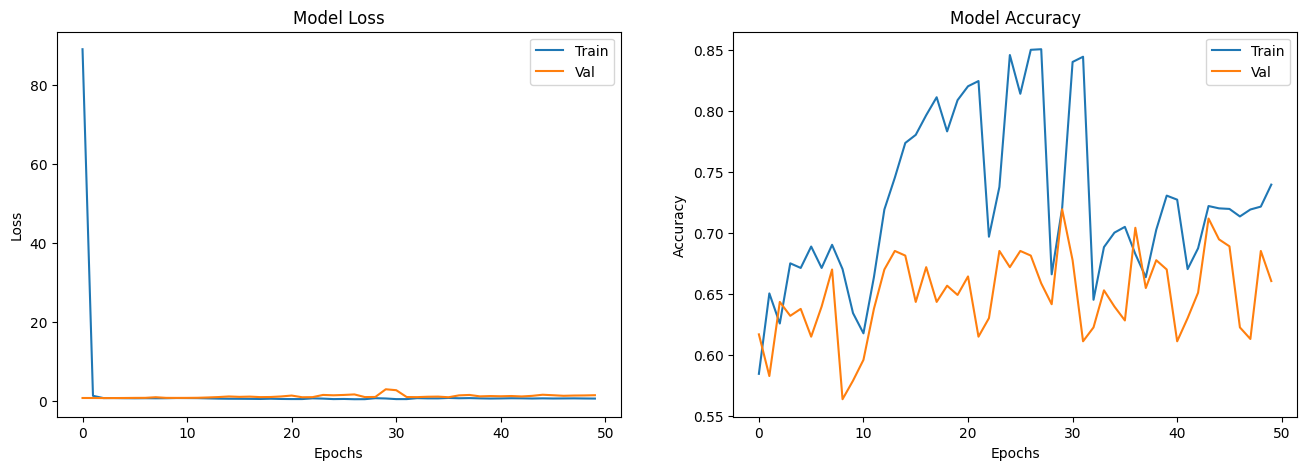

In [6]:
model_results = pd.DataFrame(history_1.history)
model_results.columns

plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.plot(model_results['loss'])
plt.plot(model_results['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

plt.subplot(1, 2, 2)
plt.plot(model_results['accuracy'])
plt.plot(model_results['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

## Tune-Model-2 (Add Image Augmentation)

In [7]:
model_3 = tf.keras.models.Sequential()
model_3.add(tf.keras.Sequential([tf.keras.layers.Rescaling(1./255)]))
model_3.add(
  tf.keras.Sequential
([
  tf.keras.layers.RandomFlip(mode="horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(factor=10), 
  tf.keras.layers.RandomZoom(0.2)
])
)
model_3.add(tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
model_3.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
model_3.add(tf.keras.layers.Conv2D(32, (3, 3), activation="relu"))
model_3.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
model_3.add(tf.keras.layers.Flatten())
model_3.add(tf.keras.layers.Dense(activation = 'relu', units = 128))
model_3.add(tf.keras.layers.Dense(activation = 'sigmoid', units = 1))

model_3.compile(optimizer = 'adam', 
                loss = 'binary_crossentropy', 
                metrics = ['accuracy'])

history_3 = model_3.fit(train_data_batches,
                         epochs = 50,
                         batch_size=batch_size,
                         validation_data = valid_data_batches)

Epoch 1/50
66/66 [==============================] - 13s 166ms/step - loss: 0.8184 - accuracy: 0.6697 - val_loss: 0.6084 - val_accuracy: 0.7021
Epoch 2/50
66/66 [==============================] - 11s 165ms/step - loss: 0.4770 - accuracy: 0.7682 - val_loss: 0.4352 - val_accuracy: 0.7951
Epoch 3/50
66/66 [==============================] - 11s 164ms/step - loss: 0.4497 - accuracy: 0.7659 - val_loss: 0.4491 - val_accuracy: 0.8008
Epoch 4/50
66/66 [==============================] - 11s 166ms/step - loss: 0.4443 - accuracy: 0.7768 - val_loss: 0.4329 - val_accuracy: 0.8008
Epoch 5/50
66/66 [==============================] - 11s 165ms/step - loss: 0.4243 - accuracy: 0.7867 - val_loss: 0.4230 - val_accuracy: 0.8102
Epoch 6/50
66/66 [==============================] - 11s 165ms/step - loss: 0.4090 - accuracy: 0.7934 - val_loss: 0.4434 - val_accuracy: 0.8065
Epoch 7/50
66/66 [==============================] - 11s 166ms/step - loss: 0.4142 - accuracy: 0.7863 - val_loss: 0.5624 - val_accuracy: 0.7097

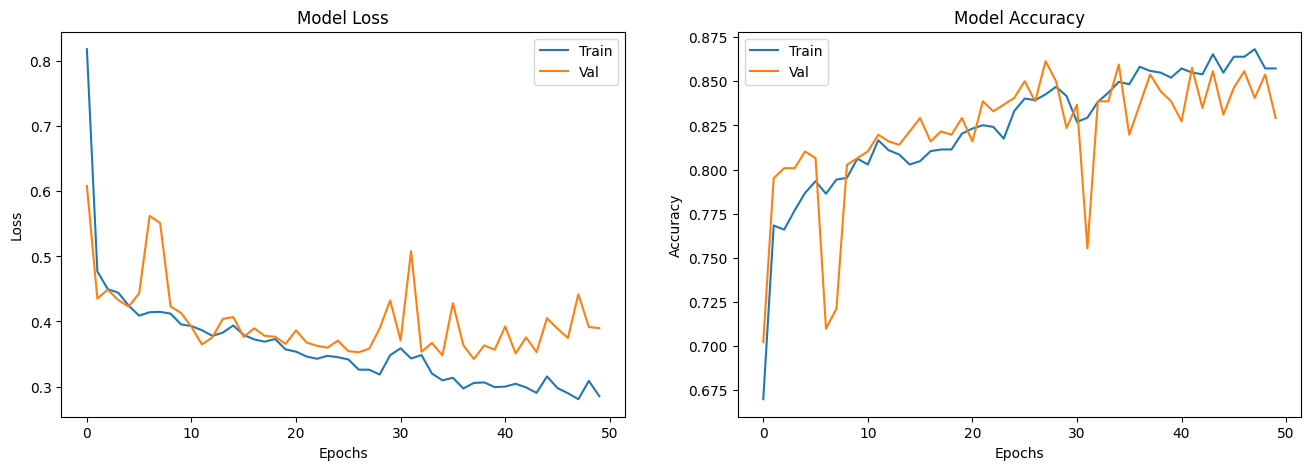

In [8]:
model_results = pd.DataFrame(history_3.history)
model_results.columns

plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.plot(model_results['loss'])
plt.plot(model_results['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

plt.subplot(1, 2, 2)
plt.plot(model_results['accuracy'])
plt.plot(model_results['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

## Tune-Model-3 (Load Pre-Trained Covnet - Resnet v2)

In [9]:
inception_resnet_v2 = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=False,
                                                                                weights="imagenet",
                                                                                input_shape=input_shape)

In [10]:
inception_resnet_v2.trainable = True
set_trainable = False

for layer in inception_resnet_v2.layers:
  if layer.name == 'block8_10_conv':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [11]:
for layer in inception_resnet_v2.layers:
    print(layer.name,layer.trainable)

input_1 False
conv2d_4 False
batch_normalization False
activation False
conv2d_5 False
batch_normalization_1 False
activation_1 False
conv2d_6 False
batch_normalization_2 False
activation_2 False
max_pooling2d_4 False
conv2d_7 False
batch_normalization_3 False
activation_3 False
conv2d_8 False
batch_normalization_4 False
activation_4 False
max_pooling2d_5 False
conv2d_12 False
batch_normalization_8 False
activation_8 False
conv2d_10 False
conv2d_13 False
batch_normalization_6 False
batch_normalization_9 False
activation_6 False
activation_9 False
average_pooling2d False
conv2d_9 False
conv2d_11 False
conv2d_14 False
conv2d_15 False
batch_normalization_5 False
batch_normalization_7 False
batch_normalization_10 False
batch_normalization_11 False
activation_5 False
activation_7 False
activation_10 False
activation_11 False
mixed_5b False
conv2d_19 False
batch_normalization_15 False
activation_15 False
conv2d_17 False
conv2d_20 False
batch_normalization_13 False
batch_normalization_16 Fals

In [12]:
model_4 = tf.keras.models.Sequential()
model_4.add(tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.Rescaling(1./255)]))
model_4.add(tf.keras.Sequential
([
  tf.keras.layers.experimental.preprocessing.RandomFlip(),
  tf.keras.layers.experimental.preprocessing.RandomRotation(10), 
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.1) 
  ]))
model_4.add(inception_resnet_v2)
model_4.add(tf.keras.layers.Flatten())
model_4.add(tf.keras.layers.Dense(activation = 'relu', units = 128))
model_4.add(tf.keras.layers.Dense(activation = 'sigmoid', units = 1))

model_4.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=['accuracy'])

history_4 = model_4.fit(train_data_batches, 
                    epochs=50, 
                    validation_data=valid_data_batches)

Epoch 1/50
66/66 [==============================] - 22s 233ms/step - loss: 0.5302 - accuracy: 0.7341 - val_loss: 0.4878 - val_accuracy: 0.7647
Epoch 2/50
66/66 [==============================] - 13s 205ms/step - loss: 0.4288 - accuracy: 0.8185 - val_loss: 0.4510 - val_accuracy: 0.7913
Epoch 3/50
66/66 [==============================] - 24s 364ms/step - loss: 0.3970 - accuracy: 0.8275 - val_loss: 0.4337 - val_accuracy: 0.8235
Epoch 4/50
66/66 [==============================] - 24s 364ms/step - loss: 0.3812 - accuracy: 0.8322 - val_loss: 0.4228 - val_accuracy: 0.8216
Epoch 5/50
66/66 [==============================] - 24s 361ms/step - loss: 0.3516 - accuracy: 0.8474 - val_loss: 0.4476 - val_accuracy: 0.8178
Epoch 6/50
66/66 [==============================] - 24s 361ms/step - loss: 0.3430 - accuracy: 0.8436 - val_loss: 0.4044 - val_accuracy: 0.8235
Epoch 7/50
66/66 [==============================] - 24s 371ms/step - loss: 0.3191 - accuracy: 0.8597 - val_loss: 0.4111 - val_accuracy: 0.8311

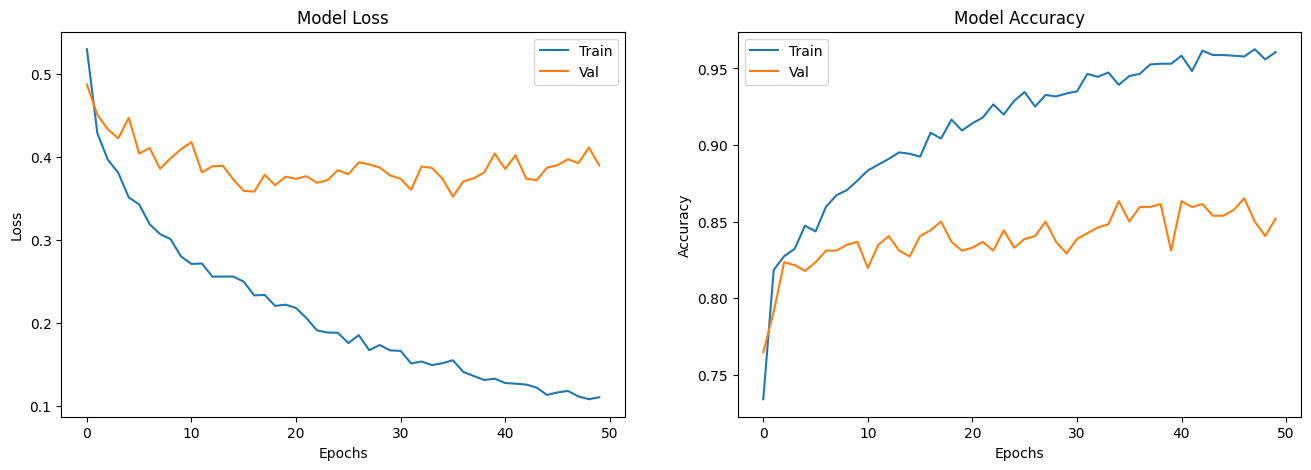

In [13]:
model_results = pd.DataFrame(history_4.history)
model_results.columns

plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.plot(model_results['loss'])
plt.plot(model_results['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

plt.subplot(1, 2, 2)
plt.plot(model_results['accuracy'])
plt.plot(model_results['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

## Tune-Model-4 (Add Image Augmentation and Add Dropout layers)

In [14]:
model_5 = tf.keras.models.Sequential()
model_5.add(tf.keras.Sequential([tf.keras.layers.Rescaling(1./255)]))
model_5.add(
  tf.keras.Sequential
([
  tf.keras.layers.RandomFlip(mode="horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(factor=10), 
  tf.keras.layers.RandomZoom(0.2)
])
)
model_5.add(tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
model_5.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
model_5.add(tf.keras.layers.Dropout(0.15))
model_5.add(tf.keras.layers.Conv2D(32, (3, 3), activation="relu"))
model_5.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
model_5.add(tf.keras.layers.Dropout(0.25))
model_5.add(tf.keras.layers.Flatten())
model_5.add(tf.keras.layers.Dense(activation = 'relu', units = 128))
model_5.add(tf.keras.layers.Dense(activation = 'sigmoid', units = 1))

model_5.compile(optimizer = 'adam', 
                loss = 'binary_crossentropy', 
                metrics = ['accuracy'])

history_5 = model_5.fit(train_data_batches,
                         epochs = 50,
                         batch_size=batch_size,
                         validation_data = valid_data_batches)

Epoch 1/50
66/66 [==============================] - 13s 166ms/step - loss: 0.8838 - accuracy: 0.5730 - val_loss: 0.6895 - val_accuracy: 0.5408
Epoch 2/50
66/66 [==============================] - 11s 165ms/step - loss: 0.5216 - accuracy: 0.7336 - val_loss: 0.4903 - val_accuracy: 0.7875
Epoch 3/50
66/66 [==============================] - 11s 164ms/step - loss: 0.4920 - accuracy: 0.7540 - val_loss: 0.5415 - val_accuracy: 0.7742
Epoch 4/50
66/66 [==============================] - 11s 165ms/step - loss: 0.4671 - accuracy: 0.7687 - val_loss: 0.4776 - val_accuracy: 0.7837
Epoch 5/50
66/66 [==============================] - 11s 166ms/step - loss: 0.4591 - accuracy: 0.7706 - val_loss: 0.4168 - val_accuracy: 0.7951
Epoch 6/50
66/66 [==============================] - 11s 167ms/step - loss: 0.4404 - accuracy: 0.7882 - val_loss: 0.4620 - val_accuracy: 0.7704
Epoch 7/50
66/66 [==============================] - 11s 165ms/step - loss: 0.4597 - accuracy: 0.7744 - val_loss: 0.4403 - val_accuracy: 0.7837

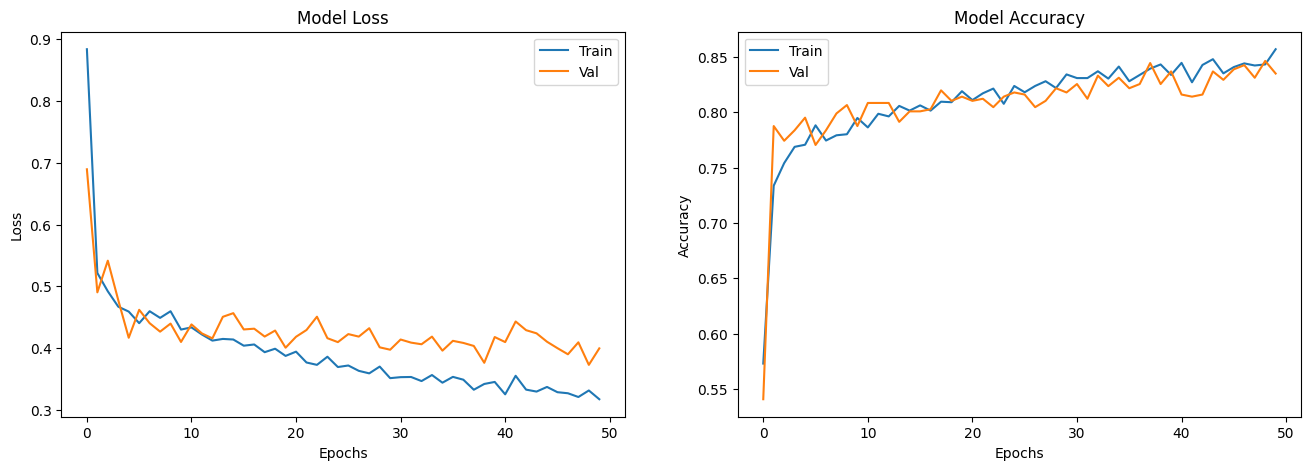

In [15]:
model_results = pd.DataFrame(history_5.history)
model_results.columns

plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.plot(model_results['loss'])
plt.plot(model_results['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

plt.subplot(1, 2, 2)
plt.plot(model_results['accuracy'])
plt.plot(model_results['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

## Create and Plot ROC and AUC on Test Data

### Check for Optimal ROC Threshold

- The optimal cut off would be where tpr is high and fpr is low
- tpr - (1-fpr) is zero or near to zero is the optimal cut off point

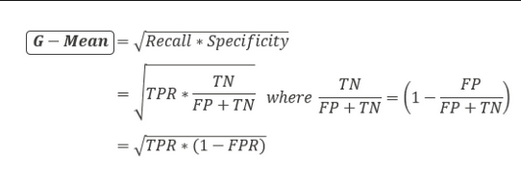

In [16]:
test_class_vals = tf.concat([y for x, y in test_data_batches], axis=0)

Threshold value is: 0.59341824


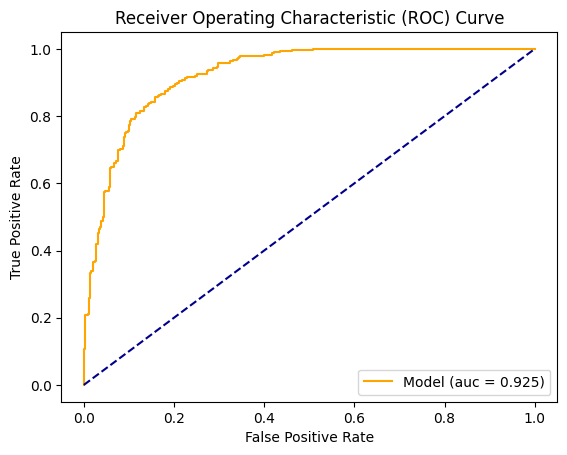

In [17]:
def plot_roc_curve(fpr, tpr):
    model_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='orange', label='Model (auc = %0.3f)'%model_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

fpr, tpr, thresholds = roc_curve(test_class_vals, model_5.predict(test_data_batches, verbose=0))
gmean = np.sqrt(tpr * (1 - fpr))
optimal_idx = np.argmax(gmean)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

## Evaluate the Selected Model and produce Metrics on Test Data

True Negative: 303  False Positive: 57
False Negative: 44     True Positive: 256


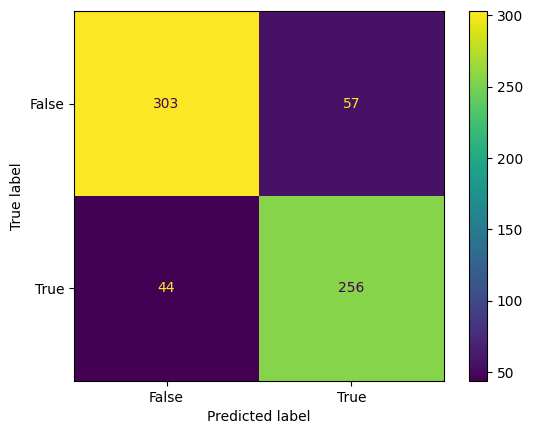

In [18]:
y_pred = np.where(model_5.predict(test_data_batches, verbose=0)>optimal_threshold, 1, 0)
cm = confusion_matrix(test_class_vals, y_pred)
tn, fp, fn, tp = cm.ravel()
print(f'True Negative: {tn}  False Positive: {fp}\nFalse Negative: {fn}     True Positive: {tp}')
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

In [19]:
acc = accuracy_score(test_class_vals,y_pred)
prec = precision_score(test_class_vals,y_pred)
recl = recall_score(test_class_vals,y_pred)
f1_sc = f1_score(test_class_vals,y_pred)

print(f'Accuracy: {acc*100}\nPrecesion: {prec*100}\nRecall: {recl*100}\nF1-Score: {f1_sc*100}')

Accuracy: 84.69696969696969
Precesion: 81.78913738019169
Recall: 85.33333333333334
F1-Score: 83.5236541598695


In [20]:
model_5.save('model_5.h5')